In [1]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=0cbba2ad6ec95430977ed4c1e8c657d9cbe6e190eb2deb35eeb70146cabf502d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define linguistic variables for error detection
data_redundancy = ctrl.Antecedent(np.arange(0, 11, 1), 'data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 11, 1), 'degradation_level')
error_history = ctrl.Antecedent(np.arange(0, 11, 1), 'error_history')

error_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'error_likelihood')

# Membership functions for data_redundancy
data_redundancy['poor'] = fuzz.trimf(data_redundancy.universe, [0, 0, 5])
data_redundancy['average'] = fuzz.trimf(data_redundancy.universe, [0, 5, 10])
data_redundancy['good'] = fuzz.trimf(data_redundancy.universe, [5, 10, 10])

# Membership functions for degradation_level
degradation_level['poor'] = fuzz.trimf(degradation_level.universe, [0, 0, 5])
degradation_level['average'] = fuzz.trimf(degradation_level.universe, [0, 5, 10])
degradation_level['good'] = fuzz.trimf(degradation_level.universe, [5, 10, 10])

# Membership functions for error_history
error_history['poor'] = fuzz.trimf(error_history.universe, [0, 0, 5])
error_history['average'] = fuzz.trimf(error_history.universe, [0, 5, 10])
error_history['good'] = fuzz.trimf(error_history.universe, [5, 10, 10])

# Membership functions for error_likelihood
error_likelihood['low'] = fuzz.trimf(error_likelihood.universe, [0, 0, 50])
error_likelihood['medium'] = fuzz.trimf(error_likelihood.universe, [0, 50, 100])
error_likelihood['high'] = fuzz.trimf(error_likelihood.universe, [50, 100, 100])


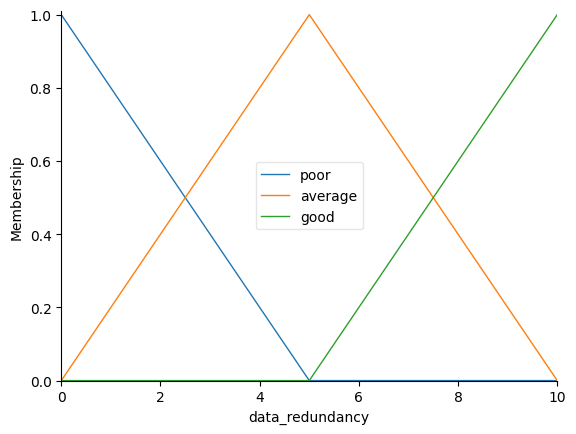

In [3]:
data_redundancy.view()

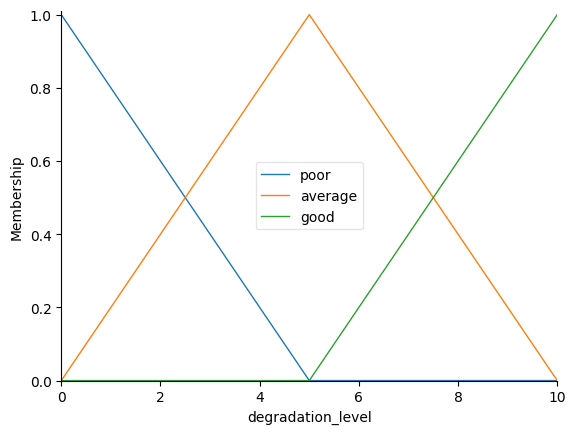

In [4]:
degradation_level.view()

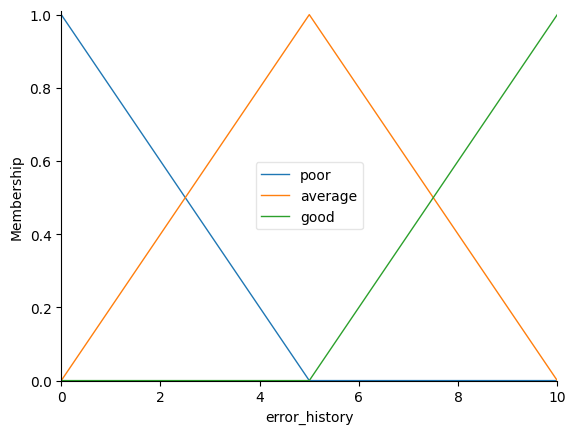

In [5]:
error_history.view()

In [6]:
# Define rules for error detection based on linguistic terms
# Fuzzy Rules
rule1 = ctrl.Rule(data_redundancy['poor'] & degradation_level['poor'] & error_history['poor'], error_likelihood['low'])
rule2 = ctrl.Rule(data_redundancy['average'] & degradation_level['average'] & error_history['average'], error_likelihood['medium'])
rule3 = ctrl.Rule(data_redundancy['good'] & degradation_level['good'] & error_history['good'], error_likelihood['high'])
rule4 = ctrl.Rule(data_redundancy['poor'] & degradation_level['average'] & error_history['good'], error_likelihood['medium'])
rule5 = ctrl.Rule(data_redundancy['average'] & degradation_level['good'] & error_history['poor'], error_likelihood['medium'])
rule6 = ctrl.Rule(data_redundancy['good'] & degradation_level['poor'] & error_history['average'], error_likelihood['medium'])
rule7 = ctrl.Rule(data_redundancy['poor'] & degradation_level['average'] & error_history['average'], error_likelihood['low'])
rule8 = ctrl.Rule(data_redundancy['average'] & degradation_level['poor'] & error_history['average'], error_likelihood['low'])
rule9 = ctrl.Rule(data_redundancy['average'] & degradation_level['average'] & error_history['poor'], error_likelihood['low'])
rule10 = ctrl.Rule(data_redundancy['good'] & degradation_level['poor'] & error_history['poor'], error_likelihood['medium'])
rule11 = ctrl.Rule(data_redundancy['poor'] & degradation_level['good'] & error_history['poor'], error_likelihood['medium'])
rule12 = ctrl.Rule(data_redundancy['poor'] & degradation_level['poor'] & error_history['average'], error_likelihood['medium'])

Enter data redundacy in the scale of 1 - 10: 1
Enter degregation level in the scale of 1 - 10: 5
Enter error history in the scale of 1 - 10: 4
Error Likelihood: 32.74509803921571
Error Likelihood is medium. Implement error masking.


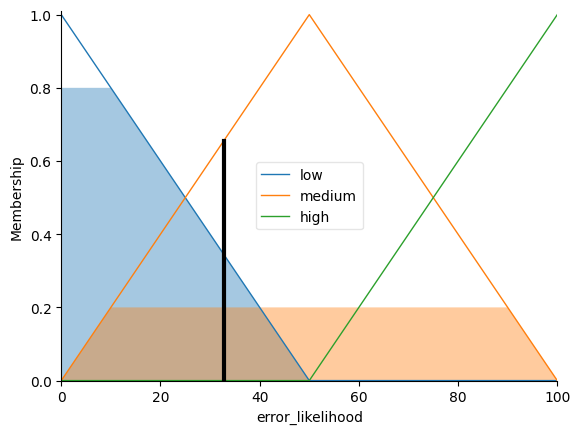

In [7]:
7# Create a control system for error detection
error_detection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7,rule8])
error_detection = ctrl.ControlSystemSimulation(error_detection_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
error_detection.input['data_redundancy'] = int(input("Enter data redundacy in the scale of 1 - 10: "))
error_detection.input['degradation_level'] = int(input("Enter degregation level in the scale of 1 - 10: "))
error_detection.input['error_history'] = int(input("Enter error history in the scale of 1 - 10: "))

# Compute the error likelihood
error_detection.compute()

# Get the output (error_likelihood) after computation
error_likelihood_result = error_detection.output['error_likelihood']

# Display the error likelihood
print("Error Likelihood:", error_likelihood_result)

# Print suggestions based on error likelihood
if error_likelihood_result <= 30:
    print("Error Likelihood is low. Consider implementing data replication.")
elif 30 < error_likelihood_result <= 70:
    print("Error Likelihood is medium. Implement error masking.")
else:
    print("Error Likelihood is high. Consider data recovery from redundancy.")

# Visualize the membership function for error_likelihood and severity_of_error
error_likelihood.view(sim=error_detection)

In [8]:
import numpy as np

# Sample data set with simulated errors
num_samples = 10

# Generate random values for data_redundancy, degradation_level, and error_history
data_redundancy_values = np.random.randint(1, 11, num_samples)
degradation_level_values = np.random.randint(1, 11, num_samples)
error_history_values = np.random.randint(1, 11, num_samples)

for i in range(num_samples):
    # Create a control system simulation for each set of inputs
    error_detection.input['data_redundancy'] = data_redundancy_values[i]
    error_detection.input['degradation_level'] = degradation_level_values[i]
    error_detection.input['error_history'] = error_history_values[i]

    # Compute the error likelihood
    error_detection.compute()

    # Get the output (error_likelihood) after computation
    error_likelihood_result = error_detection.output['error_likelihood']

    # Print the input values and the computed error likelihood
    print(f"Sample {i + 1}:")
    print(f"  Data Redundancy: {data_redundancy_values[i]}")
    print(f"  Degradation Level: {degradation_level_values[i]}")
    print(f"  Error History: {error_history_values[i]}")
    print(f"  Error Likelihood: {error_likelihood_result:.2f}%\n")


Sample 1:
  Data Redundancy: 2
  Degradation Level: 7
  Error History: 1
  Error Likelihood: 48.59%

Sample 2:
  Data Redundancy: 7
  Degradation Level: 5
  Error History: 1
  Error Likelihood: 50.00%

Sample 3:
  Data Redundancy: 3
  Degradation Level: 2
  Error History: 5
  Error Likelihood: 41.22%

Sample 4:
  Data Redundancy: 1
  Degradation Level: 5
  Error History: 4
  Error Likelihood: 32.75%

Sample 5:
  Data Redundancy: 9
  Degradation Level: 2
  Error History: 9
  Error Likelihood: 47.54%

Sample 6:
  Data Redundancy: 3
  Degradation Level: 5
  Error History: 7
  Error Likelihood: 46.23%

Sample 7:
  Data Redundancy: 7
  Degradation Level: 10
  Error History: 6
  Error Likelihood: 77.41%

Sample 8:
  Data Redundancy: 8
  Degradation Level: 7
  Error History: 6
  Error Likelihood: 51.41%

Sample 9:
  Data Redundancy: 8
  Degradation Level: 4
  Error History: 7
  Error Likelihood: 48.59%

Sample 10:
  Data Redundancy: 1
  Degradation Level: 9
  Error History: 4
  Error Likeliho